In [2]:
import os 
import keras
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from numpy import zeros
from numpy.random import randint

# Data
from tensorflow.image import resize
from keras.preprocessing.image import load_img, img_to_array

# Data Viz
import matplotlib.pyplot as plt

# Model
from keras.layers import add
from keras.layers import Input
from keras.layers import Layer
from keras.layers import Conv2D
from keras.layers import multiply
from keras.layers import concatenate
from keras.layers import Conv2DTranspose
from keras.layers import MaxPool2D
from keras.layers import UpSampling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout

# Model Functions
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import Callback, ModelCheckpoint

In [3]:
def load_image(path):
    img = resize(img_to_array(load_img(path))/255., (256,256))
    return img

In [4]:
x1 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/1.JPEG')
x2 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/2.JPG')
x3 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/3.JPG')
x4 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/4.JPG')
x5 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/5.JPG')
x6 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/6.JPG')
x7 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/7.JPG')
x8 = load_image('C:/Users/thesy/Documents/GitHub/CV_Projet/Image_Eau_Test/8.JPG')

In [5]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [6]:
def preprocess_data_augmented(image, augment=True):
    # Convert to float32 if not already
    image = tf.cast(image, tf.float32)
    
    if augment:
            
        # Random brightness
        image = tf.image.random_brightness(image, 0.2)
        
        # Random contrast
        image = tf.image.random_contrast(image, 0.8, 1.2)
        
        # Random saturation (since water has distinct color properties)
        image = tf.image.random_saturation(image, 0.8, 1.2)
        
        # Ensure values are still in [0,1]
        image = tf.clip_by_value(image, 0, 1)
    
    # Convert to [-1,1] range for the model
    image = (image * 2) - 1
    
    
    return image

In [7]:
x1_prep = preprocess_data_augmented(x1)
x2_prep = preprocess_data_augmented(x2)
x3_prep = preprocess_data_augmented(x3)
x4_prep = preprocess_data_augmented(x4)
x5_prep = preprocess_data_augmented(x5)
x6_prep = preprocess_data_augmented(x6)
x7_prep = preprocess_data_augmented(x7)
x8_prep = preprocess_data_augmented(x8)


In [23]:
print(x1_prep.shape)

(256, 256, 3)


Input image shape: (256, 256, 3)
Original shape: (256, 256, 3)
Shape after adding batch dimension: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71303505..1.0].


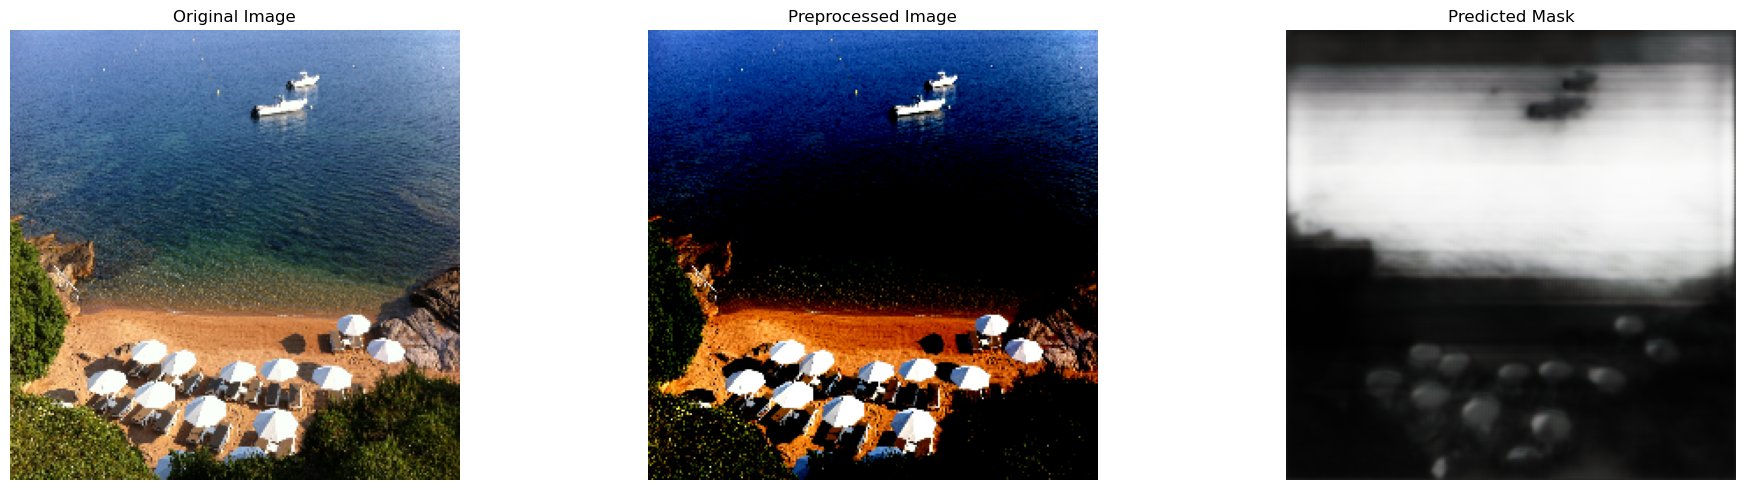

In [8]:
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('best_fcn_model.keras')

def show_predictions(model, X_orig, X_prep):
        # Print shapes for debugging
        print("Original shape:", X_prep.shape)
        
        # Ensure correct shape (256, 256, 3)
        if len(X_prep.shape) == 3:
            # Add batch dimension
            X_prep = np.expand_dims(X_prep, axis=0)
            print("Shape after adding batch dimension:", X_prep.shape)
        
        # Get prediction
        pred = model.predict(X_prep)
        pred = pred[0]  # Remove batch dimension for display
        
        plt.figure(figsize=(20, 5))
        
        # Original Image
        plt.subplot(1, 3, 1)
        show_image(X_orig, title='Original Image')
        
        # Preprocessed Image
        plt.subplot(1, 3, 2)
        show_image(X_prep[0], title='Preprocessed Image')
        
        # Predicted Mask
        plt.subplot(1, 3, 3)
        show_image(pred, title='Predicted Mask')
        
        plt.tight_layout()
        plt.show()

# Make sure preprocessing is correct
x1_prep = preprocess_data_augmented(x1)
print("Input image shape:", x1_prep.shape)

# Ensure x1_prep is numpy array
x1_prep = np.array(x1_prep)

# Show predictions
show_predictions(model, x8, x8_prep)

In [9]:
import torch
print("CUDA Available:", torch.cuda.is_available())

CUDA Available: False
